In [1]:
from graphviz import Digraph

In [4]:
class Value:
    def __init__(self, data, _children: tuple = (), _op: str = '', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self) -> str:\
        return f'Value(data={self.data})'
    
    def __add__(self, other):
        result = Value(self.data + other.data, _children={self, other}, _op='+')
        return result
    
    def __mul__(self, other):
        result = Value(self.data * other.data, _children={self, other}, _op='*')
        return result

def trace(root):
    nodes, edges = set(), set()
    print(f'root: {root}')
    print(f'root._prev: {root._prev}')
    print(f'nodes: {nodes}')
    print(f'edges: {edges}\n')

    def build(v):
        print(f'Node: {v}')
        print(f'Node._prev: {v._prev}')
        if v not in nodes:
            print(f'Node {v} not in nodes')
            nodes.add(v)
            print(f'Node {v} added to nodes')
        for child in v._prev:
            print(f'Child: {child}')
            edges.add((child, v))
            print(f'Edge: {child} -> {v}\n')
            build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s | data %.4f }" % (n.label, n.data, ), shape='record')

        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
        
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

a = Value(2, label='a')
b = Value(-3, label='b')
e = a * b 
e.label = 'e'

c = Value(10, label='c')

d = e + c
d.label = 'd'


root: Value(data=4)
root._prev: {Value(data=-6), Value(data=10)}
nodes: set()
edges: set()

Node: Value(data=4)
Node._prev: {Value(data=-6), Value(data=10)}
Node Value(data=4) not in nodes
Node Value(data=4) added to nodes
Child: Value(data=-6)
Edge: Value(data=-6) -> Value(data=4)

Node: Value(data=-6)
Node._prev: {Value(data=-3), Value(data=2)}
Node Value(data=-6) not in nodes
Node Value(data=-6) added to nodes
Child: Value(data=-3)
Edge: Value(data=-3) -> Value(data=-6)

Node: Value(data=-3)
Node._prev: set()
Node Value(data=-3) not in nodes
Node Value(data=-3) added to nodes
Child: Value(data=2)
Edge: Value(data=2) -> Value(data=-6)

Node: Value(data=2)
Node._prev: set()
Node Value(data=2) not in nodes
Node Value(data=2) added to nodes
Child: Value(data=10)
Edge: Value(data=10) -> Value(data=4)

Node: Value(data=10)
Node._prev: set()
Node Value(data=10) not in nodes
Node Value(data=10) added to nodes


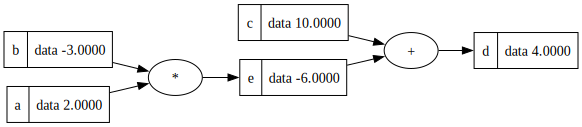

In [5]:
draw_dot(d)